# CMPINF 1205 Privacy Project

## Intro

The COVID-19 pandemic has not only shown us the flaws in our medical system, but also reignited issues with digital privacy, or the user’s right to control how their personal information is collected and used. Ineffective contact tracing has revealed that many people do not trust companies and the government with their location, medical history, and other data. This, on top of Facebook’s privacy scandal and numerous data breaches in other companies, have made the public more aware of their privacy. And yet, 74% of adults never or only sometimes read a privacy policy before agreeing to it (Auxier, et al). Why? Perhaps one of the biggest reasons is because most privacy policies are long and difficult to read, putting users at a disadvantage. This project will show that current privacy policies tend to benefit companies rather than the everyday people they are meant for. 

## Retrieving the Data

Our first step is to retrieve the data. We will be using a set of website privacy policies put together by [The Usable Privacy Policy Project](https://usableprivacy.org/) and a popular, open-source Python library called `pandas` to manipulate the data. The library `BeautifulSoup` will parse the websites' HTML pages and turn them into text.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
data = pd.read_csv('websites_opp115.csv')
data

,Site UID,Site URL,Site Human-Readable Name,Policy UID,Site Check Date,In 115 Set?,Comments,Sectoral Data,Unnamed: 8,Unnamed: 9,...,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106
0,1,theatlantic.com,The Atlantic,20,2016-02-08,Yes,"Alexa Rank: 975 (Global), 289 (US)","Arts: Literature: Authors: A: Alcott, Louisa M...","Arts: Literature: Authors: M: Merwin, W. S.: W...",Arts: Literature: World Literature: American: ...,...,Regional: North America: United States: Tennes...,Regional: North America: United States: Vermon...,Regional: North America: United States: Washin...,Regional: Oceania: Australia: New South Wales:...,Science: Agriculture: Crop Plants: Coffee,Science: Astronomy: Solar System: Dwarf Planet...,Science: Biology: Microbiology: Virology,Science: Earth Sciences: Atmospheric Sciences:...,Science: Social Sciences: Economics: Economic ...,Science: Social Sciences: Economics: People: G...
1,2,imdb.com,IMDb,21,2016-02-08,Yes,"Alexa Rank: 49 (Global), 27 (US)",Kids and Teens: Entertainment: Animation: Movies,Regional: Europe: United Kingdom: Arts and Ent...,Arts: Performing Arts: Magic: Magicians: Siegf...,...,"Arts: People: S: Sagal, Jean and Liz","Arts: People: W: Wilde, Lyn and Lee",Arts: Performing Arts: Magic: Magicians: Penn ...,Arts: Performing Arts: Puppetry: Muppets: Movi...,Arts: Performing Arts: Stunts: Players,Arts: Performing Arts: Theatre: Awards: Americ...,Arts: Television: Programs: Action and Adventu...,Arts: Television: Programs: Action and Adventu...,Arts: Television: Programs: Children's: Beetle...,Arts: Television: Programs: Comedy: Sitcoms: W...
2,3,nytimes.com,New York Times,26,2016-02-08,Yes,"Alexa Rank: 101 (Global), 22 (US)",Society: Issues: Warfare and Conflict: Specifi...,Science: Social Sciences: Psychology: Evolutio...,Society: Issues: Warfare and Conflict: Specifi...,...,Science: Technology: Space: Missions: Manned: ...,Society: Activism: Media: Culture Jamming: Spo...,Society: Crime: Sex Offenses: Child Pornograph...,Society: History: By Topic: Maritime: Ships: O...,"Society: History: Historians: Parker, Geoffrey",Society: Issues: Business: Allegedly Unethical...,Society: Issues: Education: Standardized Testing,Society: Issues: Environment: Light Pollution:...,Society: Issues: Environment: News and Media: ...,Society: Issues: Environment: News and Media: ...
3,4,theverge.com,The Verge,32,2016-02-08,Yes,"Alexa Rank: 525 (Global), 230 (US)",Home: Consumer Information: Computers and Inte...,Home: Consumer Information: Electronics: Weblogs,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,nbc.com,NBC Universal,33,2016-02-08,Yes,"Alexa Rank: 1548 (Global), 426 (US)",Kids and Teens: Entertainment: Television: Rea...,Arts: Television: Networks: NBC,Arts: Television: Programs: Action and Adventu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,111,dailynews.com,Los Angeles Daily News,1683,2016-02-08,Yes,"Alexa Rank: 34975 (Global), 7684 (US)",News: Newspapers: Regional: United States: Cal...,Regional: North America: United States: Califo...,Sports: Basketball: Professional: NBA: Los Ang...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,112,lids.com,Lids,1694,2016-02-08,Yes,"Alexa Rank: 10716 (Global), 3161 (US)",Business: Industrial Goods and Services: Packa...,Health: Animal: Alternative Medicine: Traditio...,Regional: Europe: United Kingdom: Business and...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,113,basketball-reference.com,Sports-Reference.com,1703,2016-02-08,Yes,"Alexa Rank: 8337 (Global), 2630 (US)",Sports: Basketball: Professional: NBA: Players...,Sports: Basketball: Professional: NBA: Players...,Sports: Basketball: Professional: NBA: Players...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,114,yardbarker.com,Yardbarker,1708,2016-02-08,Yes,"Alexa Rank: 12306 (Global), 2933 (US)",Sports: Football: American: Player

In [3]:
num_of_websites = len(data['Site URL'])
print('Number of websites:', num_of_websites)

Number of websites: 115


This is our dataset. As you can see, we have 115 websites with a wide variety of Alexa Ranks and from various sectors such as news, entertainment, and business. Though it isn't shown above, it also includes social media such as Instagram, large companies like Amazon and Walmart, and even three government sites. This will give us a broad pool of privacy policies to examine.

Now, let's remove any unnecessary information and turn each site's HTML file into text so they can be easily analyzed.

In [4]:
data = data.drop(columns=['Site UID', 'Site Check Date', 'In 115 Set?', 'Comments', 'Sectoral Data'])

# drop all unnamed columns
for i in range(8, 107):
    data = data.drop(columns=['Unnamed: ' + str(i)])

In [5]:
# create Filename and Text columns
data['Filename'] = ""
data['Text'] = ""

for i in range(num_of_websites):
    data.loc[i, 'Filename'] = str(data.loc[i, 'Policy UID']) + "_" + data.loc[i, 'Site URL'] + ".html" # Add filename
    
    file = open('privacy-policies/' + data.loc[i, 'Filename'], 'r', encoding = 'utf-8', errors="surrogateescape")
    
    # turn html file to text 
    soup = BeautifulSoup(file)
    data.loc[i, 'Text']= soup.get_text() # remove new lines from beginning and end
    file.close()

data = data.drop(columns=['Policy UID', 'Site URL']) # Remove UID and URL columns after use

data

,Site Human-Readable Name,Filename,Text
0,The Atlantic,20_theatlantic.com.html,"Privacy Policy Effective: January 1, 2015..."
1,IMDb,21_imdb.com.html,"IMDb Privacy Notice |||Last Updated, December..."
2,New York Times,26_nytimes.com.html,"Privacy Policy Last Updated on June 10, 20..."
3,The Verge,32_theverge.com.html,\n\n\nPrivacy Policy | Vox Media\n\n\n\n\n\n\n...
4,NBC Universal,33_nbc.com.html,Full Privacy Policy Last updated: 14 January...
...,...,...,...
110,Los Angeles Daily News,1683_dailynews.com.html,PRIVACY POLICY This policy describes the p...
111,Lids,1694_lids.com.html,"Privacy Policy |||Last updated: August 26, 20..."
112,Sports-Reference.com,1703_basketball-reference.com.html,SPORTS REFERENCE LLC - Privacy Statement |||A...
113,Yardbarker,1708_yardbarker.com.html,\n\n\n\n\n\n\n\n\n\nPrivacy Policy | FOX Sport...


## Cleaning the Data

As you can see, the text of each site is filled with newlines, punctuation, and other non-alphanumeric characters. The following code will clean this up and keep only the words. See my comments for specifics on how I do this.

In [6]:
data['Tokens'] = "" # create Tokens column

for i in range(num_of_websites):
    tokens = []
    words = data.loc[i, 'Text'].replace('\n', ' ').split() # replace newlines with spaces
                                                           # then split by spaces to turn text into words
    for word in words:
        word = word.lower() # turn lowercase
        word = word.strip('!@#$%^&*()-_=+\|/?.>,<[{}]☰;“”:""') # remove non-alphanumeric characters at start/end of word
        if word != "":
            tokens.append(word) # add cleaned word if it is not empty
        
    data.at[i, 'Tokens'] = tokens # add tokens to dataset   

data

,Site Human-Readable Name,Filename,Text,Tokens
0,The Atlantic,20_theatlantic.com.html,"Privacy Policy Effective: January 1, 2015...","[privacy, policy, effective, january, 1, 2015,..."
1,IMDb,21_imdb.com.html,"IMDb Privacy Notice |||Last Updated, December...","[imdb, privacy, notice, last, updated, decembe..."
2,New York Times,26_nytimes.com.html,"Privacy Policy Last Updated on June 10, 20...","[privacy, policy, last, updated, on, june, 10,..."
3,The Verge,32_theverge.com.html,\n\n\nPrivacy Policy | Vox Media\n\n\n\n\n\n\n...,"[privacy, policy, vox, media, iframe, src=""//w..."
4,NBC Universal,33_nbc.com.html,Full Privacy Policy Last updated: 14 January...,"[full, privacy, policy, last, updated, 14, jan..."
...,...,...,...,...
110,Los Angeles Daily News,1683_dailynews.com.html,PRIVACY POLICY This policy describes the p...,"[privacy, policy, this, policy, describes, the..."
111,Lids,1694_lids.com.html,"Privacy Policy |||Last updated: August 26, 20...","[privacy, policy, last, updated, august, 26, 2..."
112,Sports-Reference.com,1703_basketball-reference.com.html,SPORTS REFERENCE LLC - Privacy Statement |||A...,"[sports, reference, llc, privacy, statement, a..."
113,Yardbarker,1708_yardbarker.com.html,\n\n\n\n\n\n\n\n\n\nPrivacy Policy | FOX Sport...,"[privacy, policy, fox, sports, foxsports, home..."


There! We now have each site's HTML file divided up into individual words, which helps us easily examine the privacy policies.

## Analysis -- The Users

### Length

We will first take a look at the user side of privacy policies. Let's start with a pretty common complaint about privacy policies: the length. After all, who wants to read a long, boring piece of law when you can move on to the good stuff like shopping for Christmas presents on Amazon?

In [7]:
data['Length'] = None # create Length column
for i in range(num_of_websites):
    data.loc[i, 'Length'] = len(data.loc[i, 'Tokens']) # add length of privacy policy 
data

,Site Human-Readable Name,Filename,Text,Tokens,Length
0,The Atlantic,20_theatlantic.com.html,"Privacy Policy Effective: January 1, 2015...","[privacy, policy, effective, january, 1, 2015,...",3320
1,IMDb,21_imdb.com.html,"IMDb Privacy Notice |||Last Updated, December...","[imdb, privacy, notice, last, updated, decembe...",2032
2,New York Times,26_nytimes.com.html,"Privacy Policy Last Updated on June 10, 20...","[privacy, policy, last, updated, on, june, 10,...",3769
3,The Verge,32_theverge.com.html,\n\n\nPrivacy Policy | Vox Media\n\n\n\n\n\n\n...,"[privacy, policy, vox, media, iframe, src=""//w...",2608
4,NBC Universal,33_nbc.com.html,Full Privacy Policy Last updated: 14 January...,"[full, privacy, policy, last, updated, 14, jan...",4167
...,...,...,...,...,...
110,Los Angeles Daily News,1683_dailynews.com.html,PRIVACY POLICY This policy describes the p...,"[privacy, policy, this, policy, describes, the...",3383
111,Lids,1694_lids.com.html,"Privacy Policy |||Last updated: August 26, 20...","[privacy, policy, last, updated, august, 26, 2...",2357
112,Sports-Reference.com,1703_basketball-reference.com.html,SPORTS REFERENCE LLC - Privacy Statement |||A...,"[sports, reference, llc, privacy, statement, a...",1708
113,Yardbarker,1708_yardbarker.com.html,\n\n\n\n\n\n\n\n\n\nPrivacy Policy | FOX Sport...,"[privacy, policy, fox, sports, foxsports, home...",3422


We have now added the lengths of each policy to our data set. Let's find the longest, shortest, and average length.

In [8]:
maxLength = data['Length'].max()
minLength = data['Length'].min()
average = data['Length'].mean()

print('Max length:', maxLength)
print('Min length:', minLength)
print('Average length:', average)

Max length: 12538
Min length: 81
Average length: 2407.782608695652


That's a pretty wide range. Let's take a broader look at the lengths of all of these privacy policies by using `matplotlib`, a library that creates visualizations in Python.

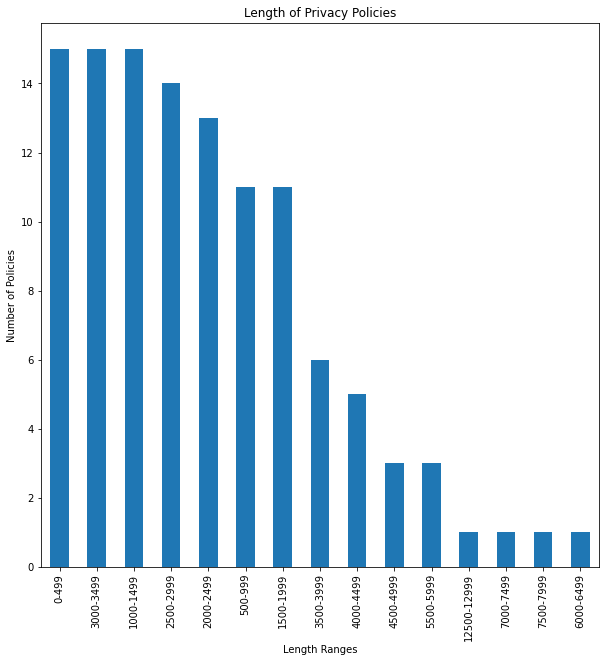

In [9]:
data['Len Range'] = None # create Len Range column

for x in range(num_of_websites):
    length = data.loc[x, 'Length']
    for i in range(0, (maxLength // 500)+1): # range increases by 500
                                             # maxLength // 500 + 1 gets the multiple of 500 above the max length
        # add range to dataset once correct range is found; then stop looking for higher ranges
        if length in range(500*i, 500*i + 500):
            data.loc[x, 'Len Range'] = str(500*i) + '-' + str(500*i+499) 
            break
            
len_range = data['Len Range'].value_counts() # gets frequencies for each range

ax = len_range.plot(kind='bar', figsize=(10,10), title="Length of Privacy Policies")
ax.set_xlabel("Length Ranges")
ax.set_ylabel("Number of Policies")
ax

The most common ranges appear to be 3000-3499, 1000-1499, and 0-499 at 15 privacy policies each. The majority of them fall under 2500 words and 82% of them fall under 3500 words. This looks somewhat promising, especially with the number of policies with a length less than 500. Word count can be hard to visualize though, so let's turn this into pages and reading time. 

According to [wordcounter.net](https://wordcounter.net/blog/2015/09/18/10655_how-many-pages-is-2000-words.html), 500 words is the equivalent of 2 double-spaced pages. Furthermore, the average person reads at 200 words per minute (WPM), and speed reading is at 700+ WPM (Sutz and Weverka). Conversions for each range in the graph are shown below:   

|   Words   | Pages |Average Reading|Speed Reading|
|-----------|-------|---------------|-------------|
|   0-499   |  0-2  |    0.0-2.5    |  0.00-0.71  |
|  500-999  |  2-4  |    2.5-5.0    |  0.71-1.43  |
| 1000-1499 |  4-6  |    5.0-7.5    |  1.43-2.14  |
| 1500-1999 |  6-8  |    7.5-10.0   |  2.14-2.86  |
| 2000-2499 |  8-10 |   10.0-12.5   |  2.86-3.57  |
| 2500-2999 | 10-12 |   12.5-15.0   |  3.57-4.29  |
| 3000-3499 | 12-14 |   15.0-17.5   |  4.29-5.00  |
| 3500-3999 | 14-16 |   17.5-20.0   |  5.00-5.71  |
| 4000-4499 | 16-18 |   20.0-22.5   |  5.71-6.43  |
| 4500-4999 | 18-20 |   22.5-25.0   |  6.43-7.14  |
| 5500-5999 | 22-24 |   27.5-30.0   |  7.86-8.57  |
| 6000-6499 | 24-28 |   30.0-32.5   |  8.57-9.29  |
| 7000-7499 | 32-34 |   35.0-37.5   | 10.00-10.71 |
| 7500-7999 | 34-36 |   37.5-40.0   | 10.71-11.43 |
|12500-12999| 50-52 |   62.5-65.0   | 17.86-18.57 |

While the average 10 page policy is certainly better than 50-52 pages, it still seems too long for users to feasibly read and comprehend before moving on to the website they are visiting. A thorough reading would require 12.5 minutes, and speed reading would require 3.57 minutes. Considering our short attention span and the urge to move on to one's true purpose on the site, a more reasonable privacy policy would probably be skimmable in less than 2 minutes. Thus, most privacy policies would fall short of the preferable average length of around 1500 words or 6 pages.

Of course, length is not the only factor we should consider when examining privacy policies. After all, short policies could be vague, or long policies could be just the right length. Let's take a look at 2 examples using "A Basic Analytical Framework For Understanding Privacy" as discussed in class.

In [10]:
data['Site Human-Readable Name'][pd.Index(data['Length']).get_loc(81)]

'Tanger Outlets'

In [11]:
data['Text'][pd.Index(data['Length']).get_loc(81)]

'Privacy Policy  |||TangerOutlets is committed to keeping your personal information confidential. Any and all personal identifiable information collected from our customers is used by Tanger Outlets only, and is not sold, shared or distributed to any third party.  |||If at any time you want your email information removed from our database, simply utilize the unsubscribe link provided in your email. Any other data updates or removal requests can be sent to TangerOutlets, Attn: Marketing Department, PO Box 10889, Greensboro, NC 27408.'

This is our shortest privacy policy: Tanger Outlets. Using the aformentioned framework:  
1. _What is the information being kept private and with whom is that information associated?_  
Tanger Outlets states that they are keeping customers' "personal identifiable information" private, though it does not specify what is included in that information other than email addresses. The information is associated with the user. 
2. _From whom is the information being withheld?_   
The information is being withheld from all third parties.
3. _What purposes would be served by withholding or not withholding the information, and whose interests do those purposes serve?_  
By withholding the information from third parties, Tanger Outlets gains the trust of its customers and protects their privacy. This is in the interest of both the customer, who gets their data protected, and the company, who gets more business.  

On the plus side, Tanger Outlets' privacy policy is brief and easy-to-read. It clearly states that information will not be given to third parties and provides ways to opt-out if the customer wishes to do so. However, the words "personal identifiable information" are vague and do not inform users exactly what data of theirs is being collected. It could be anything from credit card numbers to location to one's shopping habits. Therefore, this privacy policy is great length-wise, but missing some crucial information. 

Next, we'll pick a slightly longer privacy policy.

In [12]:
data[['Site Human-Readable Name', 'Length']][pd.Index(data['Len Range']).get_loc('1000-1499')]

,Site Human-Readable Name,Length
15,Adweek,1307
19,Food Allergy,1392
25,TGI Fridays,1399
32,The Fredrick News-Post,1048
35,USA.gov,1151
44,Dairy Queen,1148
48,The Free Dictionary,1100
57,National Zoo,1453
59,Lodge,1268
63,TED,1171


Let's choose a different type of website. USA.gov is a government site that has 1151 words in its privacy policy.

In [13]:
data['Text'][35]

'Privacy, Security, and Accessibility Policies  |||USA.gov doesn\'t collect personal information when you visit our web site unless you choose to provide that information.  |||What\'s on This Page     Information Collected and Stored Automatically     Site Security     Use of Persistent Cookies     Accessibility Policy     External Links     If You Send Us Personal Information  ||| Information Collected and Stored Automatically    When you visit USA.gov, we may store some or all of the following: the Internet protocol address from which you access USA.gov, date and time, the name of the web site from which you linked to USA.gov, the name of the file or words you searched, items clicked on a page, and the browser and operating system used.  |||This information is used to measure the number of visitors to the various sections of our site and identify system performance or problem areas. We also use this information to help us develop the site, analyze patterns of usage, and to make the s

Using the framework again:  
1. _What is the information being kept private and with whom is that information associated?_  
USA.gov clearly states what information they are collecting from its users. They may store "the Internet protocol address from which you access USA.gov, date and time, the name of the web site from which you linked to USA.gov, the name of the file or words you searched, items clicked on a page, and the browser and operating system used." This information is associated with the individual user.
2. _From whom is the information being withheld?_   
The information is being withheld from unauthorized individuals.
3. _What purposes would be served by withholding or not withholding the information, and whose interests do those purposes serve?_  
By withholding information, USA.gov protects the privacy of its users and attempts to gain trust. This serves the interests of both the users and the website. However, USA.gov also gives out user information to serve the interest of researchers, companies, and government officials. The policy states that information may be given out to "third party entities for the purposes of research analysis," "commercial software programs" for monitoring network traffic, and "authorized law enforcement" for investigations. 


USA.gov's privacy policy is more thorough than Tanger Outlets'. It clearly states what information is being stored and how it will be used. Data is scheduled to be regularly destroyed and will not be used for commercial purposes. It also provides a detailed explanation about persistant cookies to the reader in case they are not as tech-savvy and clearly states how they can avoid using them if they prefer. However, the privacy policy does not mention how to contact them if users want to remove specific information, and it is not clear what third parties or commercial software programs the website is giving data to. Also, the policy isn't clear about what the user can do if law enforcement requests their information. Does the website send them a notification? Does the user have a say in what information should be handed over? 

In short, USA.gov's longer, but still decent length allows for detailed explanations about the collected information and its uses. However, it is still vague in who information may be shared with. Note: this may be a choice by USA.gov, rather than the length. 

### Legalese

Next, let's look at legalese. The technical language of legal documents can impede comprehension and discourage average readers rather quickly. Companies may use legalese to confuse users who are not experienced with law and hide important information. I will be using a text file containing 480 legalese words from [Professor Robert Anderson's Complete Legalese Table](https://witnesseth.typepad.com/blog/complete-legalese-table.html). According to the website, "these are words that appear disproportionately more in legal contracts from the SEC's EDGAR database than in everyday writing from Google Books." 

In [14]:
legalWords = []
legalese_words = open('legalese_words.txt', 'r', encoding='utf-8') #open text file
for word in legalese_words: #add every word in file to list
    word = word.strip('\n') 
    legalWords.append(word)

In [15]:
data['Legalese'] = None #create legalese column

for x in range(num_of_websites):
    count = 0
    tokens = data.loc[x, 'Tokens']
    for word in legalWords:
        if word in tokens:
            count += tokens.count(word)
    data.loc[x, 'Legalese'] = count/data.loc[x, 'Length']
data

,Site Human-Readable Name,Filename,Text,Tokens,Length,Len Range,Legalese
0,The Atlantic,20_theatlantic.com.html,"Privacy Policy Effective: January 1, 2015...","[privacy, policy, effective, january, 1, 2015,...",3320,3000-3499,0.0195783
1,IMDb,21_imdb.com.html,"IMDb Privacy Notice |||Last Updated, December...","[imdb, privacy, notice, last, updated, decembe...",2032,2000-2499,0.0132874
2,New York Times,26_nytimes.com.html,"Privacy Policy Last Updated on June 10, 20...","[privacy, policy, last, updated, on, june, 10,...",3769,3500-3999,0.0130008
3,The Verge,32_theverge.com.html,\n\n\nPrivacy Policy | Vox Media\n\n\n\n\n\n\n...,"[privacy, policy, vox, media, iframe, src=""//w...",2608,2500-2999,0.0172546
4,NBC Universal,33_nbc.com.html,Full Privacy Policy Last updated: 14 January...,"[full, privacy, policy, last, updated, 14, jan...",4167,4000-4499,0.0167987
...,...,...,...,...,...,...,...
110,Los Angeles Daily News,1683_dailynews.com.html,PRIVACY POLICY This policy describes the p...,"[privacy, policy, this, policy, describes, the...",3383,3000-3499,0.0218741
111,Lids,1694_lids.com.html,"Privacy Policy |||Last updated: August 26, 20...","[privacy, policy, last, updated, august, 26, 2...",2357,2000-2499,0.0216377
112,Sports-Reference.com,1703_basketball-reference.com.html,SPORTS REFERENCE LLC - Privacy Statement |||A...,"[sports, reference, llc, privacy, statement, a...",1708,1500-1999,0.0210773
113,Yardbarker,1708_yardbarker.com.html,\n\n\n\n\n\n\n\n\n\nPrivacy Policy | FOX Sport...,"[privacy, policy, fox, sports, foxsports, home...",3422,3000-3499,0.0277615


I am calculating legalese by the ratio of legal words to all words. This will give us an overall view of what each privacy policy is made up of. For example, using the above table, we can see that 1.96% of The Atlantic is legalese. Let's look at the maximium, minimum, and average.

In [16]:
max_legalese = data['Legalese'].max()
min_legalese = data['Legalese'].min()
average_legalese = data['Legalese'].mean()

print('Max legal words:', max_legalese)
print('Min legal words:', min_legalese)
print('Average legal words:', average_legalese)

Max legal words: 0.0479342797894401
Min legal words: 0.005076142131979695
Average legal words: 0.018691301100988374


This doesn't seem like much, but it can be. For example, see the results of the below code.

In [17]:
website = data['Site Human-Readable Name'][pd.Index(data['Legalese']).get_loc(max_legalese)]
print('The website with the most legalese is:', website)
index = pd.Index(data['Site Human-Readable Name']).get_loc(website)
print(website, 'has a length of', data.loc[index, 'Length'])
print(data.loc[index, 'Length'], '*', max_legalese, '=', data.loc[index, 'Length'] * max_legalese, 'legal words')

The website with the most legalese is: American City Business Journals
American City Business Journals has a length of 12538
12538 * 0.0479342797894401 = 601.0 legal words


That's a lot of words. Let's read a bit of this privacy policy and see the effect of the legalese for ourselves. Note: I will be showing 500 words. To do this, I have to use the Tokens column, and thus, there are no punctuation. It should still pretty readable though. 

In [18]:
t = data.loc[index, 'Tokens'][240:740] #main portion of privacy policy starts at 240th word
string = ""
for word in t:
    string += word + " "
print(string)

this user agreement and privacy policy governs each website mobile site application and/or other service regardless of how distributed transmitted published or broadcast each a service provided by american city business journals inc its parent subsidiaries and/or affiliates we us or our that links to this user agreement and privacy policy which is binding on all those who access visit and/or use the service whether acting as an individual or on behalf of an entity including you and all persons entities or digital engines of any kind that harvest crawl index scrape spider or mine digital content by an automated or manual process or otherwise collectively you or your please read this user agreement and privacy policy carefully you can access this user agreement and privacy policy any time in the footer of the service’s home page or initial screen your access visitation and/or use of the service including without limitation any registration on any aspect of the service will constitute you

This privacy policy is pretty cold and formal and full of lengthly sentences that may bore users after the first 250 or so words. They would stop reading and not read some of the scarier messages in it such as American City Business Journals being able to take any legal action they deem necessary without notice to enforce this policy and prevent any violations. This is vague and gives a lot of power to the company. Users may get caught off guard by sudden legal action against them. 

Some may argue that the language is appropriate considering that this company publishes business journals, but not all users may be adept in the world of business. Even those who are may be tired of reading legalese all day and lose interest in reading a extremely long privacy policy. Just because the audience mostly consists of people who can read legalese doesn't mean that a company should write a lengthy, legalese-filled privacy policy.

As for legalese overall, an average of 1.87% is decent, considering that the average length 2407 * 1.87% is around 45 words. However, less legalese is preferable to make privacy policies easier to read for users.

### Reading Grade Level 

Another way to measure how readable a privacy policy is by determining the grade level. To do this, I will be using the Flesch-Kincaid formula. The Flesch-Kincaid formula, the most trusted and most used readability test available, calculates the grade level of a text using average sentence length and average syllables per word. It is often used for creating website content, writing easily understandable terms and conditions, and communicating with a non-specialist audience (“Flesch Kincaid”). Below I have listed the sites that represent (or best represent with averages) the metrics we've used previously.

In [19]:
# finds article with closest length and legalese to average
closest_length_diff = 100000000000 
closest_legalese_diff = 1000000000
closest_length_site = None
closest_legalese_site = None

for x in range(num_of_websites):
    # gets closest length so far
    if data.loc[x, 'Length'] != average and abs(data.loc[x, 'Length'] - average) < closest_length_diff:
        closest_length_diff = abs(data.loc[x, 'Length'] - average)
        closest_length_site = data.loc[x, 'Site Human-Readable Name']
    
    #gets closest legalese so far
    if data.loc[x, 'Legalese'] != average and abs(data.loc[x, 'Legalese'] - average) < closest_legalese_diff:
        closest_legalese_diff = abs(data.loc[x, 'Legalese'] - average_legalese)
        closest_legalese_site = data.loc[x, 'Site Human-Readable Name']

        
# prints results
print('min length:', data['Site Human-Readable Name'][pd.Index(data['Length']).get_loc(minLength)])
print('max length:', data['Site Human-Readable Name'][pd.Index(data['Length']).get_loc(maxLength)])
print('average length:', closest_length_site)
print()
print('min legalese:', data['Site Human-Readable Name'][pd.Index(data['Legalese']).get_loc(min_legalese)])
print('max legalese:', data['Site Human-Readable Name'][pd.Index(data['Legalese']).get_loc(max_legalese)])
print('average legalese:', closest_legalese_site)

min length: Tanger Outlets
max length: American City Business Journals
average length: High Gear Media

min legalese: Community Coffee
max legalese: American City Business Journals
average legalese: The Atlantic


I have also included other sites to give us a better view of the entire dataset. Then, I copied and pasted each site's privacy policy into a Flesch Kincaid calculator to determine the grade level.

|Site|Reason Chosen|Grade Level|
|----|-------------|-----------|
|Tanger Outlets|Min Length|College|
|American City Business Journals|Max Length, Max Legalese|Professional|
|High Gear Media|Average Length|College|
|Community Coffee|Min Legalese|College|
|The Atlantic|Average Legalese|College Graduate|
|Instagram|Social Media|College|
|Minecraft|Video Game|College Graduate|
|Library of Congress|Govt Site|College|
|Amazon|Shopping|College|
|Taylor Swift|Celebrity Site|College|
|TED|Education|College|
|Google Sites|Internet|College|
|Dog Breed Info|Smaller Site|10-12th Grade

From this table, it looks like the majority of the privacy policies are at a college reading level, followed by a college graduate reading level. This is really concerning considering that the average reader has skills equivalent to an 8th grader ("Flesch Kincaid"). Most people will have trouble reading privacy policies and may not completely understand what's in them. Thus, they could miss vital information, or companies could hide details by using higher level language. Privacy policies should be relatively inclusive to everyone, and that means they must be tailored them to meet the needs of the average user.

## Analysis -- The Companies

On the flip side, companies profit from difficult-to-read privacy policies and users’ inclination to accept them blindly. Let's see how they can do this through details in their policies.

### Key Terms

There are several key terms users can look for in privacy policies that may indicate that a company is selling data to third parties or using it for advertising and marketing. The following counts the number of key terms that occur in each privacy policy.

In [20]:
data['Key Terms'] = None
key_terms = ['cookies', 'third-party', 'advertising', 'selling', 'commercial', 'broker', 'marketing', 'affiliated', 
             'affiliate', 'affiliates', 'transfer', 'share', 'disclaimer', 'disclaimers', 'disclose', 'partner',
            'advertise', 'sell', 'market']

for x in range(num_of_websites):
    tokens = data.loc[x, "Tokens"]
    count = 0
    for term in key_terms: # look for each key term
        if term in tokens:
            
            # Prevents adding counts if policy says it is "not selling information" or something similar
            # by checking for "not" or "no" before key term
            if ("not" in tokens and abs(tokens.index("not") - tokens.index(term)) > 10) \
                or ("no" in tokens and abs(tokens.index("no") - tokens.index(term)) > 10): 
                count += tokens.count(term) # count number of times word occurs
    data.loc[x, 'Key Terms'] = count
data

,Site Human-Readable Name,Filename,Text,Tokens,Length,Len Range,Legalese,Key Terms
0,The Atlantic,20_theatlantic.com.html,"Privacy Policy Effective: January 1, 2015...","[privacy, policy, effective, january, 1, 2015,...",3320,3000-3499,0.0195783,52
1,IMDb,21_imdb.com.html,"IMDb Privacy Notice |||Last Updated, December...","[imdb, privacy, notice, last, updated, decembe...",2032,2000-2499,0.0132874,40
2,New York Times,26_nytimes.com.html,"Privacy Policy Last Updated on June 10, 20...","[privacy, policy, last, updated, on, june, 10,...",3769,3500-3999,0.0130008,57
3,The Verge,32_theverge.com.html,\n\n\nPrivacy Policy | Vox Media\n\n\n\n\n\n\n...,"[privacy, policy, vox, media, iframe, src=""//w...",2608,2500-2999,0.0172546,37
4,NBC Universal,33_nbc.com.html,Full Privacy Policy Last updated: 14 January...,"[full, privacy, policy, last, updated, 14, jan...",4167,4000-4499,0.0167987,72
...,...,...,...,...,...,...,...,...
110,Los Angeles Daily News,1683_dailynews.com.html,PRIVACY POLICY This policy describes the p...,"[privacy, policy, this, policy, describes, the...",3383,3000-3499,0.0218741,58
111,Lids,1694_lids.com.html,"Privacy Policy |||Last updated: August 26, 20...","[privacy, policy, last, updated, august, 26, 2...",2357,2000-2499,0.0216377,27
112,Sports-Reference.com,1703_basketball-reference.com.html,SPORTS REFERENCE LLC - Privacy Statement |||A...,"[sports, reference, llc, privacy, statement, a...",1708,1500-1999,0.0210773,7
113,Yardbarker,1708_yardbarker.com.html,\n\n\n\n\n\n\n\n\n\nPrivacy Policy | FOX Sport...,"[privacy, policy, fox, sports, foxsports, home...",3422,3000-3499,0.0277615,54


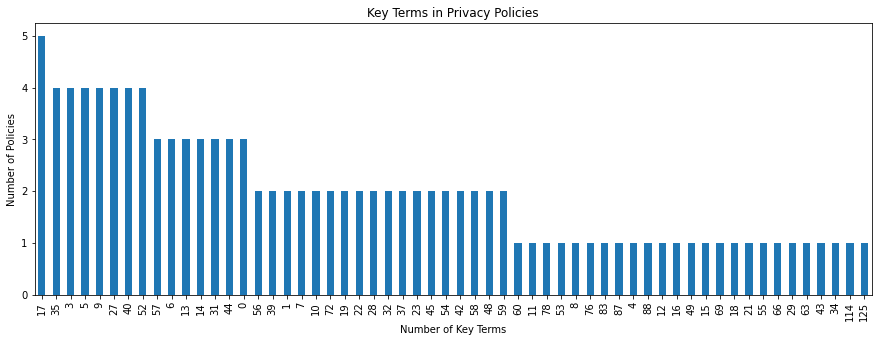

In [21]:
len_range=data['Key Terms'].value_counts() # gets frequencies for each range

ax = len_range.plot(kind='bar', figsize=(15,5), title="Key Terms in Privacy Policies")
ax.set_xlabel("Number of Key Terms")
ax.set_ylabel("Number of Policies")
ax

As we can see, nearly all of the privacy policies have key terms that suggest that the company is profiting off of user data. Only 3 policies have 0 of those key terms, and 1 policy has 125 terms. 

Furthermore, many privacy policies do not specify what third parties they are giving information to. Users may think that there are only a few businesses or that the businesses are well-known and safe, but the truth can be very different. Below are two websites that do reveal what third parties they work with:

**New York Times**: Adobe, Amazon, AppsFlyer, AppNexus, Bing, Chartbeat, comScore, Commission Junction, Facebook, Google, Google Analytics, LinkedIn, Liveintent, LivePerson, Localytics, Media.net, Moveable Ink, Omnivirt, OpenX, Optimizely, Oracle, Partnerize, Pintrest, Pubmatic, Rakuten, Reddit, ROKT, Rubicon, Sizmek, Snap, The Trade Desk, Triplelift, Tune, Twitter, Verison OATH ("Third Parties")  
**Paypal**: Bank of America N.A., Discover Financial Services, JPMorgan Chase Bank, Wells Fargo, American Express, International Incorporated, Coinbase Inc., WorldPay, Inc., Heartland Payment Systems, Inc., Merchant e-Solutions, Inc., Network Merchants, LLC., Network Merchants Inc., Royal Exchange, Socure, Inc., White Pages, Inc., Pipl, Inc., Full Contact, Inc., Trillium, Global Data Corporation, RSA Security Inc., Aristotle International, Inc., ThreatMetrix Inc., TeleSign Corporation, Mitek Systems Inc., Jumio Inc, Syniverse Technologies, LLC, ArkOwl LLC, MaxMind, Inc., Kount, Inc., Artefacts Solutions LLC, Experian Information Solutions, Inc., Trulioo Information Services, Inc., Creditsafe USA Inc., Yodlee Inc., Xero Inc., LexisNexis Risk Solutions, Dun & Bradstreet, Inc., Global Data Consortium, Inc., Regulatory Data Corporation, Acton International Ltd, **and more...** ("List of")

### The Profit

Companies can make a lot of money from user data. They can sell it to third parties, use it in their marketing, and target specific audiences with advertising. This will bring in more customers and increase their profit. Unfortunately, I could not find clear data showing truly how much companies make from doing this. However, [vox.com](https://www.vox.com/recode/2019/6/24/18715421/internet-free-data-ads-cost) has estimated that each user's data is worth $35 per month for advertising alone. Considering that websites have billions of users every month, this adds up to a tremendous amount of money. It makes sense that companies would want to hide details about how they use data in difficult-to-read privacy policies, for if a user finds some detail that they are wary of, the user may decide not to visit the site. 

## Conclusion

### Disclaimers

First, there are several disclaimers to this project. 
1. This dataset was created in 2016, so the privacy policies used in this project may be an older version of what websites' have now. However, I don't see them changing drastically, so the results of this project is still relevant to current day.
2. Length, legalese, and reading grade level may not tell the whole story. It is only a part of what a privacy policy consists of, and to truly get a full overview of this dataset, one must read all 115 for themselves.   
    a. As I mentioned earlier, a shorter policy is not always good, and a longer policy is not always bad.  
    b. Legalese can be calculated in various ways. I chose the method I used based on my knowledge of legalese and the resources I had available.  
    c. As for the reading grade level metric, note that Flesch Kincaid is not the only way to check readability, just the one I believe worked the best for this project. Furthermore, I did my best to get a full overview of the dataset using a few, thoughtfully selected sites, but the only way to truly do that is to manually put each policy in a Flesch Kincaid calculator.  
3. When calculating the number of key terms in a privacy policy, I attempt to avoid phrases such as "do not sell data" by checking for a "not" or "no" nearby. However, English is a complicated language, and there may be phrases that I missed.
4. In this project, I am not implying that _all_ companies are writing privacy policies to benefit themselves. There are companies that do have their users' best interests at heart.

### Final Statements

Looking at the user side, both the length and legalese of the dataset are adaquate but could be better. Reading grade level on the other hand is especially problematic, considering that the average person reads at an 8th grade level while most privacy policies are college level and beyond. As for the company side, the data definitely shows that most companies included in this dataset use the collected information for profit, whether through third parties, advertising, or some other method. Furthermore, from looking at the estimated value of a person's data, one can easily draw the conclusion that it is in the best interest of companies to have vague, difficult-to-read privacy policies. Therefore, the analysis shows that companies do reap the benefits, but the users aren't at as much as a disadvantage as I initially thought, considering that both length and legalese have decent averages. Of course, there's still much room for improvement.

So, some advice for companies:
- Write concise but thorough privacy policies to keep them skimmable and informative. Around 1500 words is a good goal to shoot for, though being detailed is preferable to a shorter length.
- Keep legalese to an absolute minimum. Not all of us are lawyers or in business, and legal langauge can be difficult to understand.
- Ensure that the average reader can understand your privacy policy. Keep in mind that this means aiming for an 8th grade reading level.

Some advice for users:
- Don't skip privacy policies! At the very least, skim over it quickly.
- Look for key words such as cookies, third parties, etc. THese may be followed by important information you should know.
- Use a search engine if you're unsure about the meaning of a word or concept

If you take one message from this project, remember this: READ A PRIVACY POLICY BEFORE AGREEING TO IT. Users should be aware of what information they are allowing companies to collect and share. Their personal data could be sold to hundreds of businesses and fall into the wrong hands if security is not up to scratch. They could be tracked using their location and targeted by ads and scams. Their identities could also be at risk if a company experiences a data breach, as shown frequently in recent news. Furthermore, remember that privacy policies may not be created for the very users they are meant for. By emphasizing and bringing awareness to this issue, perhaps more efforts will be made to write user-friendly policies and give everyday people a clear understanding of how their information is being used every time they visit a website. 

I hope you enjoyed this project as much as I did. Thanks for reading!

## Works Cited

Anderson, Robert. "Complete Legalese Table." _WITNESSETH: Law, Deals, & Data_, https://witnesseth.typepad.com/blog/complete-legalese-table.html.

Auxier, Brooke, et al. “Americans and Privacy: Concerned, Confused and Feeling Lack of Control Over Their Personal Information.” _Pew Research Center, 15 Nov 2019_, https://www.pewresearch.org/internet/2019/11/15/americans-and-privacy-concerned-confused-and-feeling-lack-of-control-over-their-personal-information/.  

“Flesch Kincaid Grade Level Readability.” TextCompare.org, https://www.textcompare.org/readability/flesch-kincaid-grade-level/. 

"How Many Pages Is 2000 Words?" _WordCounter.net_, 18 Sept 2015, https://wordcounter.net/blog/2015/09/18/10655_how-many-pages-is-2000-words.html.

"List of Third Parties (other than PayPal Customers) with Whom Personal Information May be Shared." _PayPal_, https://www.paypal.com/ie/webapps/mpp/ua/third-parties-list.

Sutz, Richard and Peter Weverka. "Speed Reading For Dummies Cheat Sheet." _dummies.com_, https://www.dummies.com/education/language-arts/speed-reading/speed-reading-for-dummies-cheat-sheet/.

Molla, Rani. "The cost of an ad-free internet: $35 more per month." _Vox_, 24 Jun 2019, https://www.vox.com/recode/2019/6/24/18715421/internet-free-data-ads-cost.

"Third Parties." _The New York Times_, https://www.nytimes.com/privacy/third-party.
  
Wilson, Shomir, et al. "The creation and analysis of a website privacy policy corpus." _Proceedings of the 54th Annual Meeting of the Association for Computational Linguistics_, August 2016, https://www.usableprivacy.org/static/files/swilson_acl_2016.pdf. 